# Support Vector Machines - SVMs - Regression

Ideea din spatele Regresiei pentu SVM este foarte similară cu cea care stă și la baza clasificării. Ceea ce dorim acuma este facem predicție pentru un element contionuu având un anumit set de features. O să trecem direct la partea practică

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/DATA/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

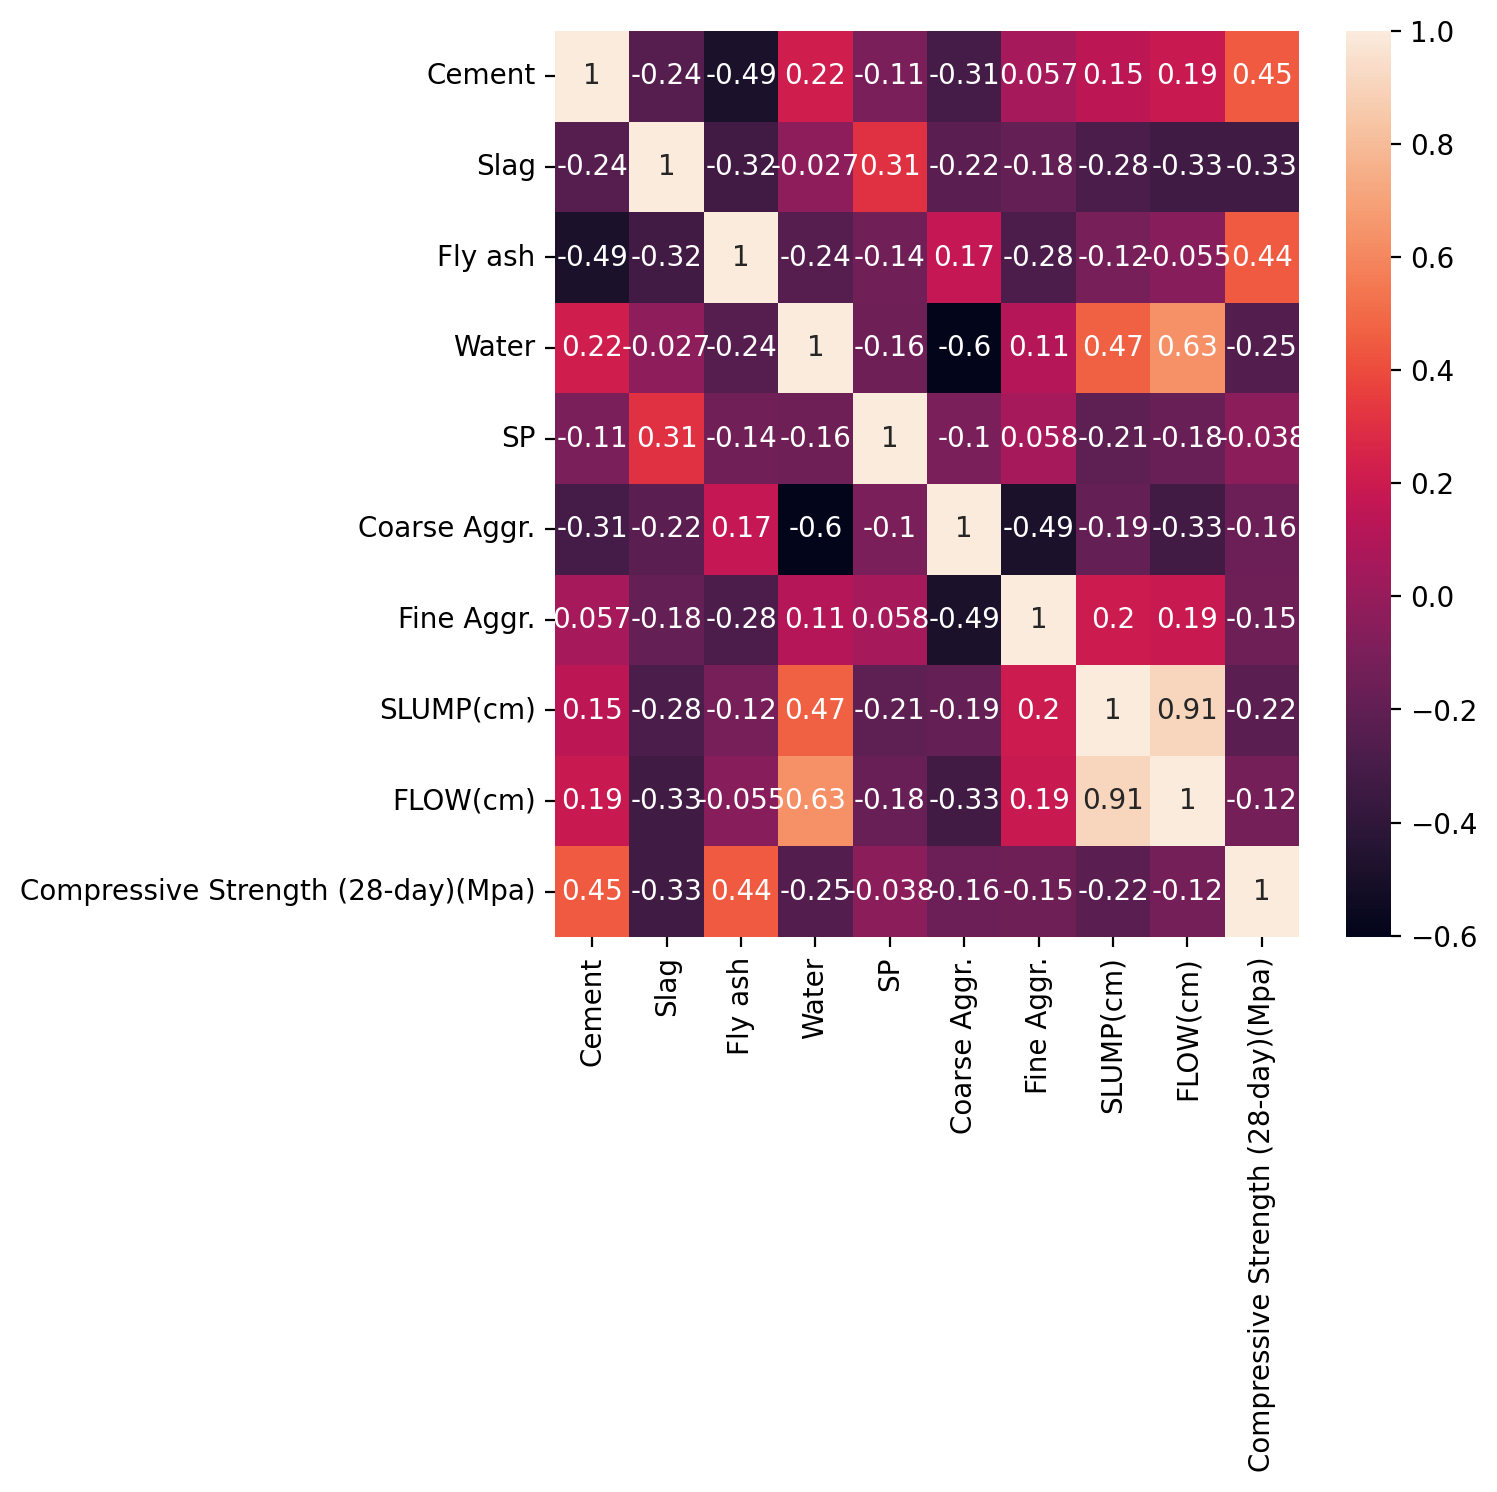

In [5]:
plt.figure(figsize=(6, 6), dpi=200)
sns.heatmap(df.corr(), annot=True)

In [6]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [7]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [8]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Ce este foarte important la partea de Machine Learning atunci când avem de a face cu anumite obiecte geometrice (precum hyperplanes care pot fi linii sau forme) este să ne scalăm datele înainte. Acest pas este extrem de important pentru SVM în Machine Learning. Dacă nu suntem siguri ce tip de date avem și dacă este nevoie sau nu să ne scalăm datele, atunci indicat ar fi ca acestea să se scaleze deoarece de cele mai multe ori ne oferă un rezultat mai bun

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Modelul SMV de regresie se găsește în același modul de sklearn.svm. Există două modele pe care le putem utiliza, și anume SVR și LinearSVR. LinearSVR este un algoritm mult mai rapid și mai performant, însă acesta poate să folosească doar un kernel de tip 'linear'. Dacă avem un set de date cu care dorim să experimentăm mai multe kernel-uri, atunci o să fim nevoiți să utilizăm SVR.

In [24]:
from sklearn.svm import SVR, LinearSVR

In [25]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


Algorimtul de Regression din SVM (SVR) este destul de asemănător cu cel ce Classification în ceea ce privește hyperparametrii pe care acesta îi are. Un hyperparametru nou în cadrul acestui algoritm este 'epsilon'. Parametrul respectiv ne permite să îi spunem algoritmului câtă eroare să permită per instanță de antrenare

In [26]:
model = SVR()

In [27]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE = {MAE}')
print(f'RMSE = {RMSE}')

MAE = 5.236902091259179
RMSE = 6.695914838327133


In [29]:
y_test.mean()

36.26870967741935

Valorile pentru rezultatele de mai sus sunt obținute utilizând un model basic, fără a modifica hyperparametrii. Pentru a modifica acești hyperparametrii putem să utilizăm partea de GridSearch împreună cu cross_validation

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1], 
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['auto', 'scale'], 
            'degree': [2, 3, 4],
            'epsilon': [0, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 5]}

In [31]:
grid_model = GridSearchCV(model, param_grid=param_grid)

In [32]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1],
                         'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [34]:
grid_model.best_params_

{'C': 0.75, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [35]:
y_pred = grid_model.predict(X_test)

In [36]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE = {MAE}')
print(f'RMSE = {RMSE}')

MAE = 2.58035622053414
RMSE = 3.253177556288361


Din datele de mai sus se poate observa faptul că performanța modelului a crescut semnificativ față de modelul basic. Acest lucru ne spune că de fiecare dată când creem un anumit model de Machine Learning este indicat să folosim GridSearchCV pentru a găsi hyperparametrii cei mai buni și cei mai eficienți. Este recomandat să oferim o gamă cât mai mare pentru acești hyperparametrii și să lăsăm codul să ruleze atunci când ne luăm o pauză, sau când nu suntem presați de timp.

## Recapitulare

În această lecție despre Regression cu SVMs am învățat:

    1. De unde să importăm modelele de Regression

        from sklearn.svm import SVR, LinearSVR
    
    2. Care este diferența dintre SVR și Linear SVR

        LinearSVR este mai rapid, dar funcționează doar cu un kernel de tipul 'linear'

    3. Care sunt parametrii noi ai acestor modele

        epsilon = precizează algoritmului câtă eroare să permită per instanță la antrenare

    4. Este recomandat să utilizăm GridSearchCV cu o gamă cât mai mare de valori pentru diferiți hyperparametrii pentru a găsi cele mai bune valori. Dacă durează mult această parte, se poate rula codul în timul nopții